In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
import pandas as pd
import os
from statsmodels.stats.multitest import multipletests
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
import collections
from scipy.stats import chi2_contingency
from lifelines import CoxPHFitter
from pathlib import Path

pd.options.display.max_columns = 200
os.chdir('..')
output_path = '20200515_paper_figures/phylo500_results'
Path(output_path).mkdir(parents=True, exist_ok=True)
import warnings
warnings.filterwarnings("ignore")


Bad key "text.kerning_factor" on line 4 in
/Users/JudithAbecassis/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
clonesig_res = pd.read_csv('20201011_phylo500_results.csv', sep='\t')
clonesig_res_ith = clonesig_res[clonesig_res.method.isin(['ccube', 'clonesig', 'sciclone', 'tracksig', 'palimpsest', 'dpclust', 'phylogicndt', 'tracksigfreq'])]
clonesig_res_sig = clonesig_res[clonesig_res.method.isin(['clonesig', 'deconstructsigs', 'tracksig', 'palimpsest', 'tracksigfreq'])]
clonesig_res_ith_pyc = clonesig_res[clonesig_res.method.isin(['ccube', 'clonesig', 'sciclone', 'tracksig', 'palimpsest', 'dpclust', 'phylogicndt', 'tracksigfreq', 'pyclone'])]


In [4]:
method_color_dict = {'ccube': '#548ebb', 'clonesig': '#fc9d53',
                     'deconstructsigs':'#793d66', 'palimpsest':'#e45683',
                     'pyclone': '#87d0bd', 'sciclone': '#e1f5aa',
                     'tracksig': '#c4c3f9', 'dpclust': '#90c9e8',
                    'phylogicndt': '#F3BEDF', 'tracksigfreq': '#8942fc'}
legend_keys = {'ccube': 'Ccube', 'tracksig': 'TrackSig',
               'tracksigfreq': 'TrackSigFreq', 'pyclone': 'PyClone',
               'sciclone': 'SciClone', 'palimpsest': 'Palimpsest',
               'deconstructsigs': 'deconstructSigs',
               'phylogicndt': 'PhylogicNDT', 'dpclust': 'DPClust',
               'clonesig': 'CloneSig'}

In [5]:
clonesig_res.head()

,sample,cancer_loc,nb_mut,true_nb_clones,true_purity,perc_dip,var_or_cst,median_depth,fitted_nb_clones,ll_ratio,pval,score1B,score1C,score2A,score2C_auc,score2C_accuracy,score2C_sensitivity,score2C_specificity,score2C_precision,score_sig_1A,score_sig_1B,score_sig_1C_auc,score_sig_1C_accuracy,score_sig_1C_sensitivity,score_sig_1C_specificity,score_sig_1C_precision,score_sig_1D,min_diff_distrib_mut,max_diff_distrib_mut,std_diff_distrib_mut,median_diff_distrib_mut,perc_dist_5,perc_dist_10,runtime,method
0,2,Liver-HCC,1942,5,0.67,1.0,var,37.0,2.0,NaN,NaN,0.500000,0.951559,0.411737,0.897319,0.901133,0.925590,0.869048,0.925590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16572.0,pyclone
1,2,Liver-HCC,1942,5,0.67,1.0,var,37.0,4.0,NaN,NaN,0.833333,0.565662,0.001185,0.511400,0.563852,0.900181,0.122619,0.900181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,sciclone
2,2,Liver-HCC,1942,5,0.67,1.0,var,37.0,2.0,NaN,NaN,0.500000,0.951747,0.412943,0.899387,0.902678,0.923775,0.875000,0.923775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.0,ccube
3,2,Liver-HCC,1942,5,0.67,1.0,var,37.0,2.0,NaN,NaN,0.500000,0.952564,0.417801,0.900803,0.902678,0.914701,0.886905,0.914701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095.0,dpclust
4,2,Liver-HCC,1942,5,0.67,1.0,var,37.0,2.0,NaN,NaN,0.500000,0.951792,0.406525,0.897290,0.900618,0.921960,0.872619,0.921960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,516.0,phylogicndt


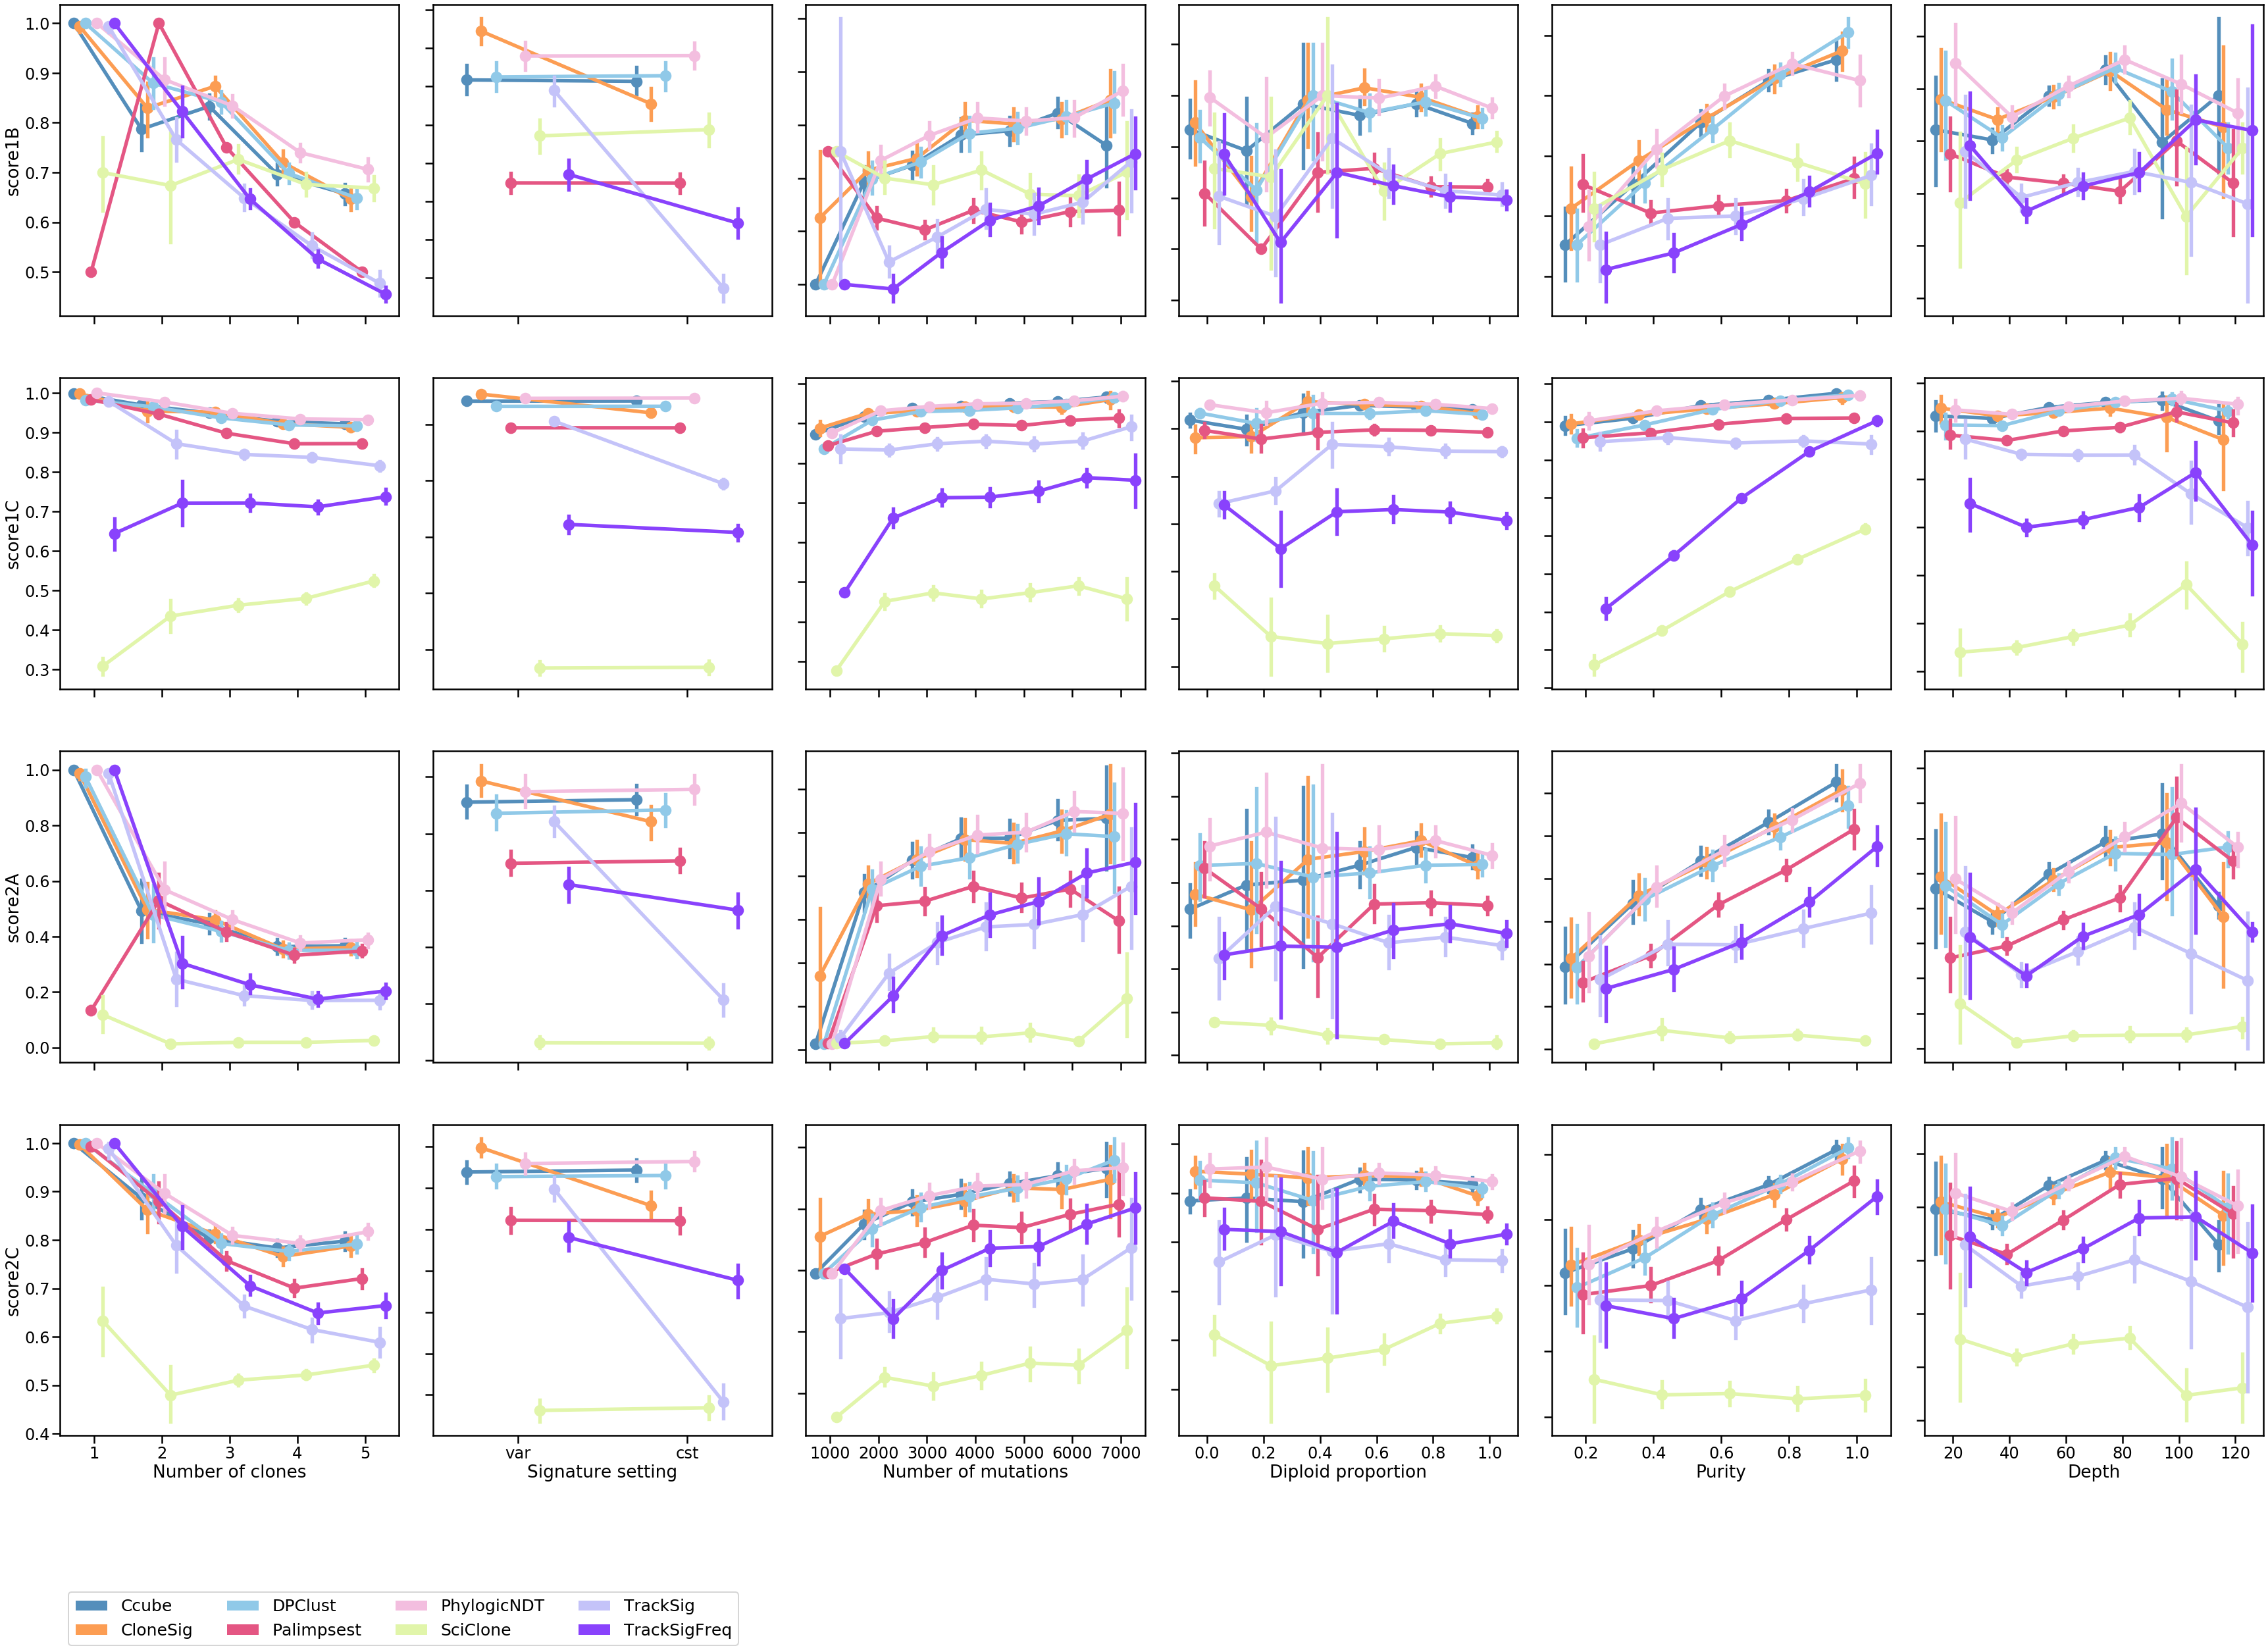

In [6]:
sns.set_context('poster', font_scale=1.1)
id_vars = ['sample', 'var_or_cst']
sub_clonesig_res_ith = clonesig_res_ith.copy()
nice_name = ['Number of clones', 'Signature setting', 'Number of mutations', 'Diploid proportion', 'Purity', 'Depth']
f, axes = plt.subplots(nrows=4, ncols=6, figsize=(60, 40))
sub_clonesig_res_ith = sub_clonesig_res_ith.assign(score2C=sub_clonesig_res_ith.score2C_accuracy)
for ii, score in enumerate(['score1B', 'score1C', 'score2A', 'score2C']):
    
    aa = sub_clonesig_res_ith.dropna(subset=[score]).groupby(id_vars).method.nunique().to_frame().reset_index()
    aa = aa.assign(nb_method=aa.method).drop(columns=['method'])
    sub_clonesig_res_complete = pd.merge(sub_clonesig_res_ith, aa,
                                         on=id_vars)
    sub_clonesig_res_filter = sub_clonesig_res_complete[sub_clonesig_res_complete.nb_method==8]
    sub_clonesig_res_filter = sub_clonesig_res_filter.assign(round_nb_mut=(np.round(sub_clonesig_res_filter.nb_mut/1000, 0)*1000).astype(int))
    sub_clonesig_res_filter = sub_clonesig_res_filter.assign(round_perc_dip=np.round(np.round(sub_clonesig_res_filter.perc_dip/0.2, 0)*0.2, 1))
    sub_clonesig_res_filter = sub_clonesig_res_filter.assign(round_purity=np.round(np.round(sub_clonesig_res_filter.true_purity/0.2, 0)*0.2, 1))
    sub_clonesig_res_filter = sub_clonesig_res_filter.assign(round_depth=np.round(np.round(sub_clonesig_res_filter.median_depth/20, 0)*20, 0).astype(int))


    for jj, var in enumerate(['true_nb_clones', 'var_or_cst', 'round_nb_mut', 'round_perc_dip', 'round_purity', 'round_depth']):
        sns.pointplot(x=var, y=score, hue="method",
                        data=sub_clonesig_res_filter,
                        hue_order=sorted(sub_clonesig_res_filter.method.unique()),
                       palette=[method_color_dict[i] for i in sorted(sub_clonesig_res_filter.method.unique())],
                         jitter=True, ax=axes[ii, jj], size=10, join=True, dodge=0.6)
        ax = axes[ii, jj]
        if (ii==3) and (jj==0):
            legend_items = list()
            for key in sorted(sorted(sub_clonesig_res_filter.method.unique())):
                legend_items.append(Patch(facecolor=method_color_dict[key], edgecolor='white', label=legend_keys[key]))
            ax.legend(handles=legend_items,
                      bbox_to_anchor=(0, -0.7, 1., .102), fontsize=25, loc=3, ncol=4)
        else:
            ax.get_legend().remove()

        if jj!=0:
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
        if ii!=3:
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
        else:
            ax.set_xlabel(nice_name[jj])
plt.subplots_adjust(wspace=0.1)
plt.savefig('{}/all_comp_method_results_ith_only_complete.pdf'.format(output_path), bbox_inches='tight')

In [7]:
sub_clonesig_res_filter[sub_clonesig_res_filter.var_or_cst=='varying']['sample'].nunique()

0

In [8]:
sub_clonesig_res_filter[sub_clonesig_res_filter.var_or_cst=='constant']['sample'].nunique()

0

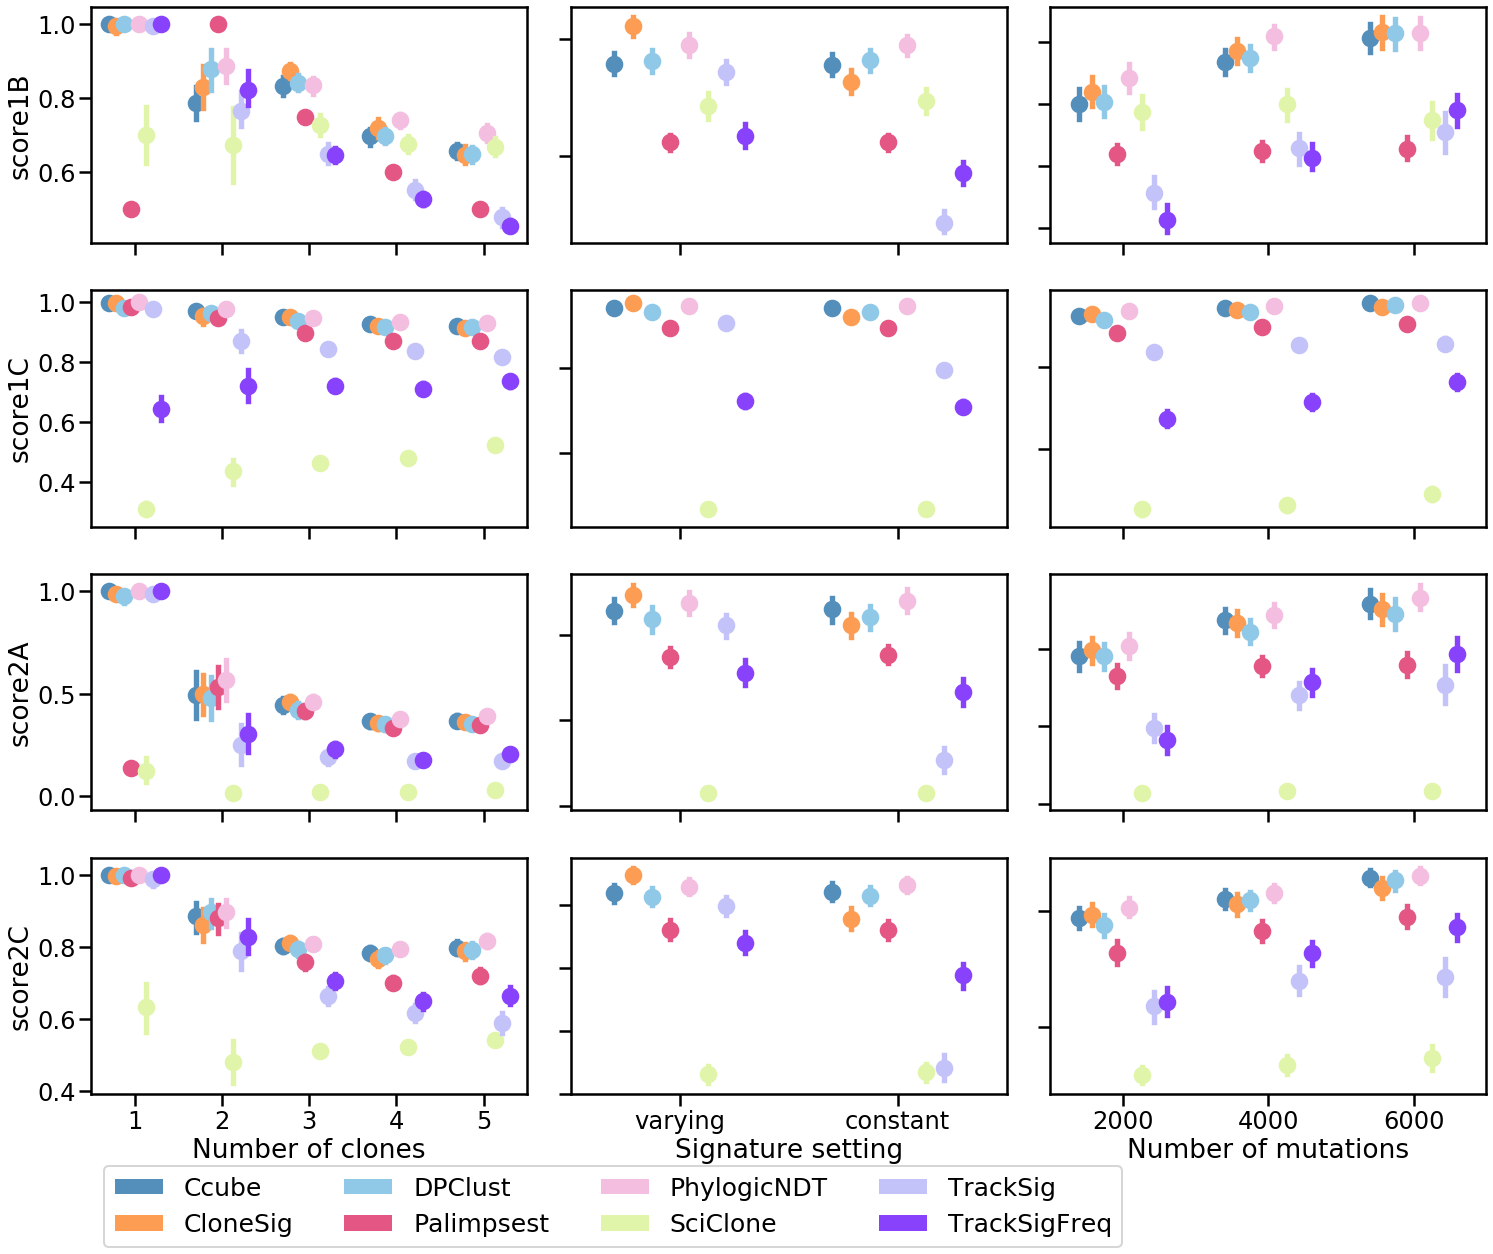

In [9]:
sns.set_context('poster', font_scale=1.1)
id_vars = ['sample', 'var_or_cst']
sub_clonesig_res_ith = clonesig_res_ith.copy()
nice_name = ['Number of clones', 'Signature setting', 'Number of mutations']
f, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 20))
sub_clonesig_res_ith = sub_clonesig_res_ith.assign(score2C=sub_clonesig_res_ith.score2C_accuracy)
score_list = ['score1B', 'score1C', 'score2A', 'score2C']
aa = sub_clonesig_res_ith.dropna(subset=score_list).groupby(id_vars).method.nunique().to_frame().reset_index()
aa = aa.assign(nb_method=aa.method).drop(columns=['method'])
sub_clonesig_res_complete = pd.merge(sub_clonesig_res_ith, aa,
                                     on=id_vars)
sub_clonesig_res_filter = sub_clonesig_res_complete[sub_clonesig_res_complete.nb_method==8]
sub_clonesig_res_filter = sub_clonesig_res_filter.assign(round_nb_mut=(np.round(sub_clonesig_res_filter.nb_mut/2000, 0)*2000).astype(int))
sub_clonesig_res_filter = sub_clonesig_res_filter.assign(round_perc_dip=np.round(np.round(sub_clonesig_res_filter.perc_dip/0.2, 0)*0.2, 1))
sub_clonesig_res_filter = sub_clonesig_res_filter.assign(round_purity=np.round(np.round(sub_clonesig_res_filter.true_purity/0.2, 0)*0.2, 1))
sub_clonesig_res_filter = sub_clonesig_res_filter.assign(round_depth=np.round(np.round(sub_clonesig_res_filter.median_depth/20, 0)*20, 0).astype(int))
sub_clonesig_res_filter = sub_clonesig_res_filter.assign(var_or_cst=sub_clonesig_res_filter.var_or_cst.map({'var': 'varying', 'cst': 'constant'}))

for ii, score in enumerate(score_list):
    for jj, var in enumerate(['true_nb_clones', 'var_or_cst', 'round_nb_mut']):
        sns.pointplot(x=var, y=score, hue="method",
                        data=sub_clonesig_res_filter,
                        hue_order=sorted(sub_clonesig_res_filter.method.unique()),
                       palette=[method_color_dict[i] for i in sorted(sub_clonesig_res_filter.method.unique())],
                         jitter=True, ax=axes[ii, jj], size=10, join=False, dodge=0.6)
        ax = axes[ii, jj]
        if (ii==3) and (jj==0):
            legend_items = list()
            for key in sorted(sorted(sub_clonesig_res_filter.method.unique())):
                legend_items.append(Patch(facecolor=method_color_dict[key], edgecolor='white', label=legend_keys[key]))
            ax.legend(handles=legend_items,
                      bbox_to_anchor=(0, -0.7, 1., .102), fontsize=25, loc=3, ncol=4)
        else:
            ax.get_legend().remove()

        if jj!=0:
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
        if ii!=3:
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
        else:
            ax.set_xlabel(nice_name[jj])
plt.subplots_adjust(wspace=0.1)
plt.savefig('{}/all_comp_method_results_ith_only.pdf'.format(output_path), bbox_inches='tight')

In [10]:
for jj, var in enumerate(['true_nb_clones', 'var_or_cst', 'round_nb_mut']):
    print(sub_clonesig_res_filter.pivot_table(index=var, columns='method', values='score1B', aggfunc='count'))

method          ccube  clonesig  dpclust  palimpsest  phylogicndt  sciclone  \
true_nb_clones                                                                
1                  85        85       85          85           85        85   
2                  47        47       47          47           47        47   
3                 223       223      223         223          223       223   
4                 250       250      250         250          250       250   
5                 236       236      236         236          236       236   

method          tracksig  tracksigfreq  
true_nb_clones                          
1                     85            85  
2                     47            47  
3                    223           223  
4                    250           250  
5                    236           236  
method      ccube  clonesig  dpclust  palimpsest  phylogicndt  sciclone  \
var_or_cst                                                                
constant 

In [11]:
sub_clonesig_res_filter = sub_clonesig_res_filter.assign(fullname=sub_clonesig_res_filter['sample'].astype(str) + '_' + sub_clonesig_res_filter['var_or_cst'])
sub_clonesig_res_filter[['fullname']].nunique()

fullname    841
dtype: int64

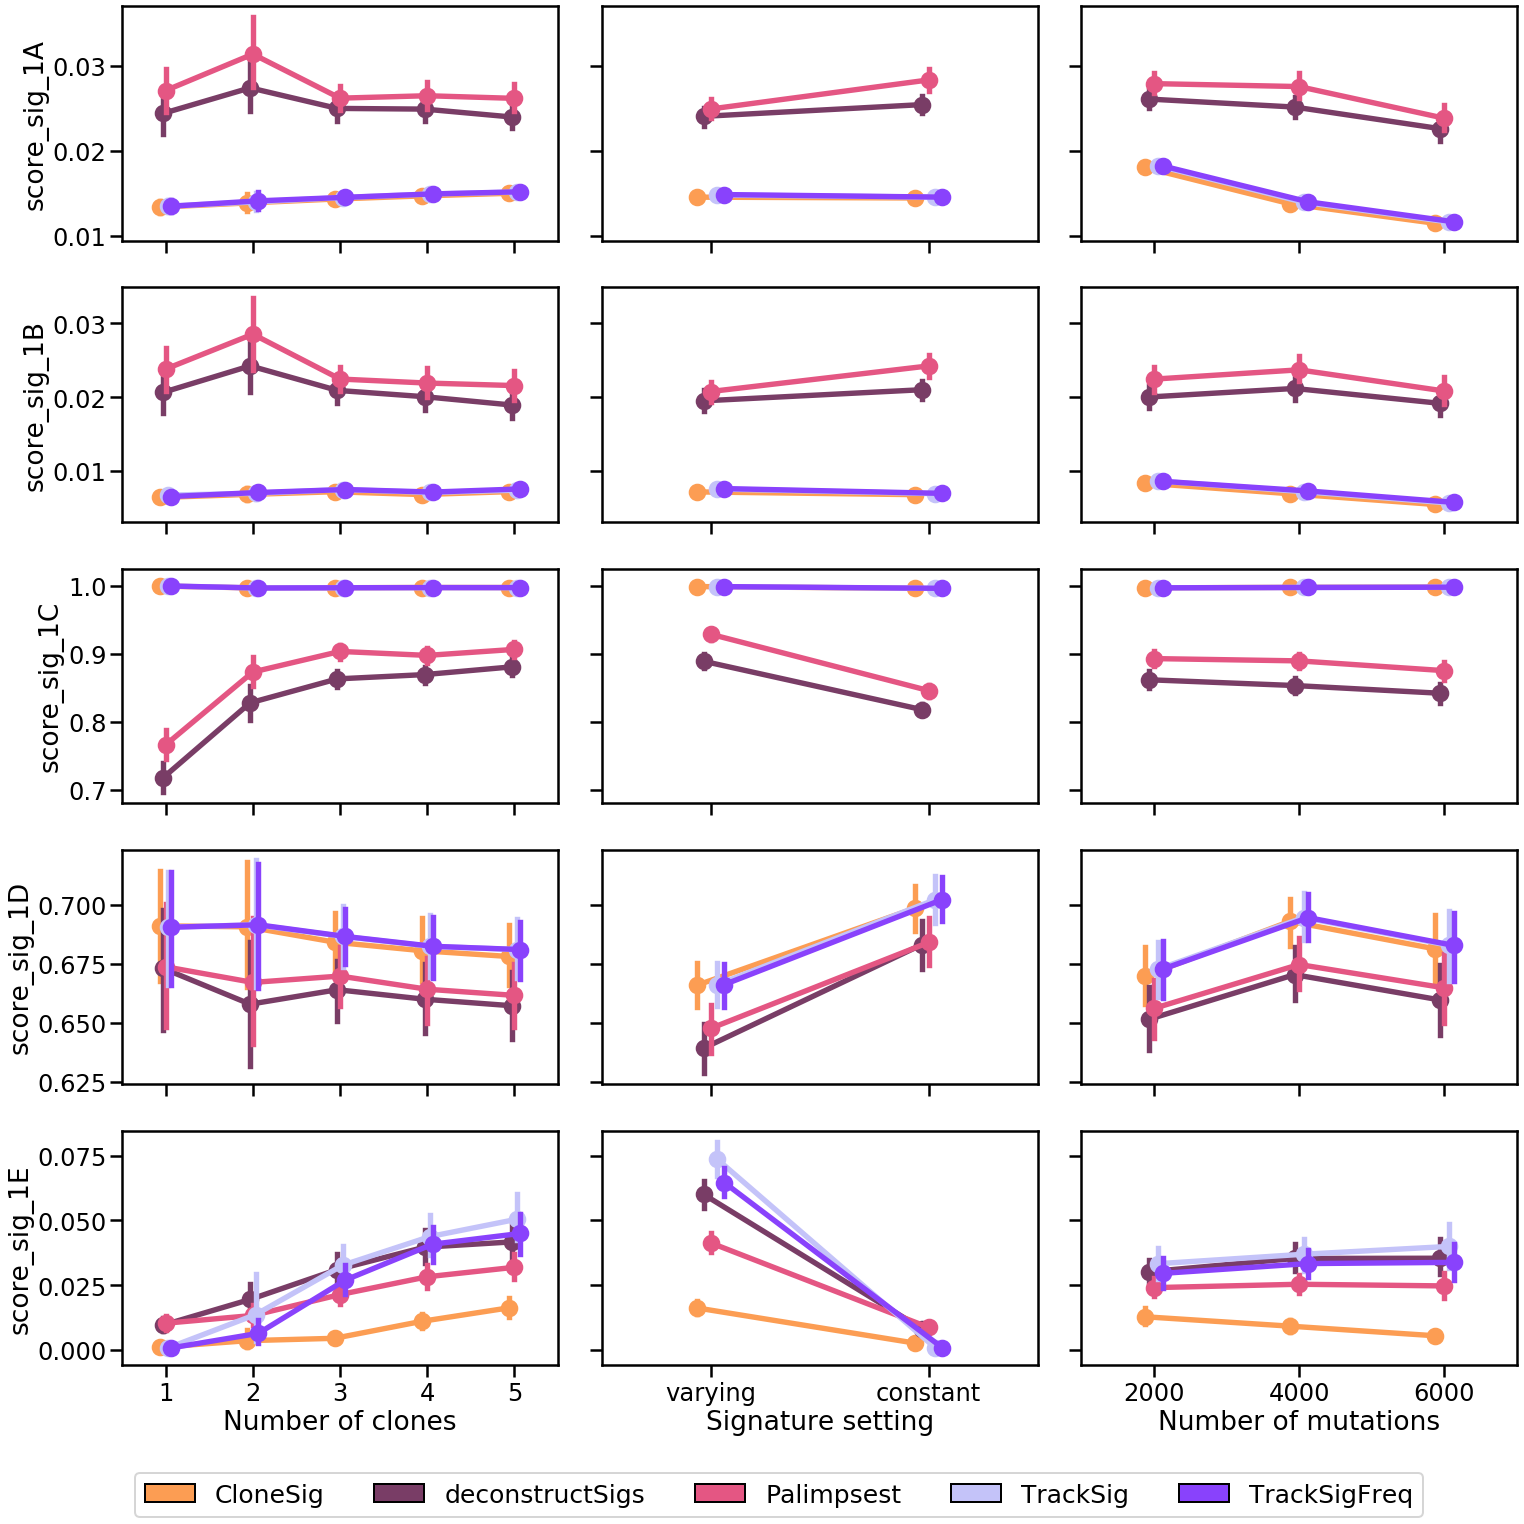

In [12]:
sns.set_context('poster', font_scale=1.1)
nice_name = ['Number of clones', 'Signature setting', 'Number of mutations']
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25, 25), sharey='row', sharex='col')
clonesig_res_sig_copy = clonesig_res_sig.copy()
clonesig_res_sig_copy = clonesig_res_sig_copy.assign(score_sig_1E=clonesig_res_sig_copy.median_diff_distrib_mut)
clonesig_res_sig_copy = clonesig_res_sig_copy.assign(score_sig_1C=clonesig_res_sig_copy.score_sig_1C_auc)
sub_clonesig_res = clonesig_res_sig_copy

score_list = ('score_sig_1A', 'score_sig_1B',
                'score_sig_1C', 'score_sig_1D',
                'score_sig_1E')
aa = sub_clonesig_res.dropna(subset=score_list).groupby(id_vars).method.nunique().to_frame().reset_index()
aa = aa.assign(nb_method=aa.method).drop(columns=['method'])
sub_clonesig_res_complete = pd.merge(sub_clonesig_res, aa,
                                     on=id_vars)
sub_clonesig_res_filter = sub_clonesig_res_complete[sub_clonesig_res_complete.nb_method==5]
sub_clonesig_res_filter = sub_clonesig_res_filter.assign(round_nb_mut=(np.round(sub_clonesig_res_filter.nb_mut/2000, 0)*2000).astype(int))
sub_clonesig_res_filter = sub_clonesig_res_filter.assign(var_or_cst=sub_clonesig_res_filter.var_or_cst.map({'var': 'varying', 'cst': 'constant'}))

for ii, score in enumerate(score_list):

    for jj, covariate in enumerate(('true_nb_clones', 'var_or_cst', 'round_nb_mut')):




        sns.pointplot(x=covariate, y=score, hue="method",
                        data=sub_clonesig_res_filter, palette=[method_color_dict[i.split('-')[0]] for i in sorted(sub_clonesig_res_filter.method.unique())],
                        hue_order=sorted(sub_clonesig_res_filter.method.unique()), ax=axes[ii, jj], dodge=True)

        ax = axes[ii, jj]
        n = len(ax.artists)
        nb_box = sub_clonesig_res_filter.method.nunique()
        labels = sub_clonesig_res_filter.pivot_table(columns=covariate, values=score,
                                             index="method", aggfunc='count')\
            .unstack().dropna().index.to_frame().apply(tuple, axis=1).values
        box_name = sorted(sub_clonesig_res_filter.method.unique())
        
        if (ii==4) and (jj==0):
            legend_items = list()
            for key in sorted(sorted(sub_clonesig_res_filter.method.unique())):
                legend_items.append(Patch(facecolor=method_color_dict[key], edgecolor='black', label=legend_keys[key]))
            ax.legend(handles=legend_items,
                      bbox_to_anchor=(0, -0.7, 1., .102), fontsize=25, loc=3, ncol=5)
        else:
            ax.get_legend().remove()

        if jj!=0:
            ax.set_ylabel('')
            #ax.yaxis.set_ticklabels([])
        if ii!=4:
            ax.set_xlabel('')
            #ax.xaxis.set_ticklabels([])
        else:
            ax.set_xlabel(nice_name[jj])
plt.subplots_adjust(wspace=0.1)
plt.savefig('{}/all_comp_method_results_sig_only.pdf'.format(output_path), bbox_inches='tight')


In [13]:
for jj, var in enumerate(['true_nb_clones', 'var_or_cst', 'round_nb_mut']):
    print(sub_clonesig_res_filter.pivot_table(index=var, columns='method', values='score_sig_1B', aggfunc='count'))

method          clonesig  deconstructsigs  palimpsest  tracksig  tracksigfreq
true_nb_clones                                                               
1                     87               87          87        87            87
2                     47               47          47        47            47
3                    223              223         223       223           223
4                    250              250         250       250           250
5                    236              236         236       236           236
method      clonesig  deconstructsigs  palimpsest  tracksig  tracksigfreq
var_or_cst                                                               
constant         428              428         428       428           428
varying          415              415         415       415           415
method        clonesig  deconstructsigs  palimpsest  tracksig  tracksigfreq
round_nb_mut                                                               
2000  